# MLG: Lab 5 (Part 1)

Throughout the laboratories, questions that you should try to answer are highlighted as follow :

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: This is a bonus question. Answer it for your own comprehension. </p>

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: This is a question</p>

You will need [these files](Lab5_Part1.zip) in order to succeed.

## Report

We ask you a basic report answering the following constraints:
- You should answer all purple questions.
- You should introduce and conclude each question with whatever you understand about it
- Report should be in pdf format and is limited to 5 pages
- This laboratory is in two parts. Your report should cover both parts!


## Introduction

In this laboratory, we will work with a different type of problem called unsupervised learning.
When we talk about unsupervised learning, it means that we are trying to find **hidden structure** in unlabeled data. Therefore, no simple measure exists to evaluate a potential solution.


We will focus on a commonly used algorithm to solve this kind of problem called "Self Organizing Maps".
As you saw in the theoretical part of the course, the main advantage of this algorithm is its topological ordering, which means that the maps can be visualized as **elastic grids**. Therefore they can be easily plotted.

## Pre-requisites

For the following exercises, you could need several new packages. Install them as follows:

    $ pip install kohonen
    
After these, you should be able to import them. If any error occurs after, it maybe because some modules are missing. Try to install them with:

    $ conda install name_of_the_missing_module

## Exercise 1 : Animals

### Dataset information

In the general sense, the Self-Organizing Maps algorithm is used as a dimensionality reduction algorithm. It transforms a "n-dimensional" data into a 2-dimensional elastic grid.

In this particular exercise, we will look at an example from the course: applying SOM on animals data.

Each row is an animal, and is constructed by the presence (1) or absence (0) of 13 different attributes. You can look at the plot hereafter, or generate it yourself with this code:

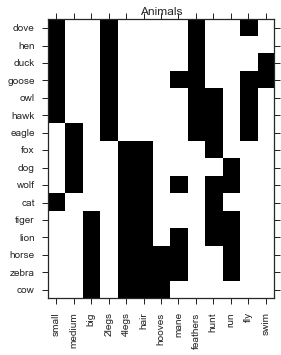

In [1]:
import KohonenUtils
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import cm
import matplotlib.patches as mpatches
import math
%matplotlib inline

animals = pd.DataFrame(columns=['small', 'medium', 'big', '2legs', '4legs', 'hair', 'hooves',
                                'mane', 'feathers', 'hunt', 'run', 'fly', 'swim'])

matrix = np.array([[1,0,0,1,0,0,0,0,1,0,0,1,0],
                   [1,0,0,1,0,0,0,0,1,0,0,0,0],
                   [1,0,0,1,0,0,0,0,1,0,0,0,1],
                   [1,0,0,1,0,0,0,1,1,0,0,1,1],
                   [1,0,0,1,0,0,0,0,1,1,0,1,0],
                   [1,0,0,1,0,0,0,0,1,1,0,1,0],
                   [0,1,0,1,0,0,0,0,1,1,0,1,0],
                   [0,1,0,0,1,1,0,0,0,1,0,0,0],
                   [0,1,0,0,1,1,0,0,0,0,1,0,0],
                   [0,1,0,0,1,1,0,1,0,1,1,0,0],
                   [1,0,0,0,1,1,0,0,0,1,0,0,0],
                   [0,0,1,0,1,1,0,0,0,1,1,0,0],
                   [0,0,1,0,1,1,0,1,0,1,1,0,0],
                   [0,0,1,0,1,1,1,1,0,0,1,0,0],
                   [0,0,1,0,1,1,1,1,0,0,1,0,0],
                   [0,0,1,0,1,1,1,0,0,0,0,0,0]])

for i, row in enumerate(matrix):
    animals.loc[i] = row

animals.index = ['dove', 'hen', 'duck', 'goose', 'owl', 'hawk', 'eagle', 'fox',
                 'dog', 'wolf', 'cat', 'tiger', 'lion', 'horse', 'zebra', 'cow']

pl.figure(figsize=(5,5))
pl.xticks(np.arange(matrix.shape[1]), animals.columns, rotation=90)
pl.yticks(np.arange(matrix.shape[0]), animals.index)
pl.title('Animals')
_ = pl.imshow(matrix, interpolation='nearest', cmap=cm.binary)

This is the features on which we will run our SOM algorithm in order to find an inherent data structure, or similarities between samples.

### Definition of the problem

In this problem, we will apply the SOM algorithm as follows:
    
1. Initialize SOM with its parameters (such as size of the map, neighborood size, learning rate...)
2. Sequentially present a random sample animal for the map to learn
3. Repeat step 2 until the whole dataset was learned t times

After the SOM has been "trained", we can then visualize it by plotting its U-Matrix (also known as Unified Distance Matrix) which shows the neurons and the distance with their neighbors.
To construct a U-Matrix, we need to:

1. Create a cell for each neuron
2. Create a cell for each 1-1 connection between two neurons
3. Assign these new cells the distance between the two neurons they connect (higher is further apart)

In the end, if we have a very simple SOM (2x2):

    Neuron(0) - Neuron(1)
       |           |
    Neuron(2) - Neuron(4)

The corresponding U-Matrix (2\*2 -1=3, 2\*2 -1=3) will be:

    Neuron(0) - Dist(0,1) - Neuron(1)
       |           |           |
    Dist(0,2) -  ?????    - Dist(1,3)
       |           |           |
    Neuron(2) - Dist(2,3) - Neuron(3)
    

We are only going to plot the distances.

Let us present the animal dataset 10 times to a newly generated kohonen map. We can then compute its U-matrix and plot the result.

### First tests with SOM and U-Matrix

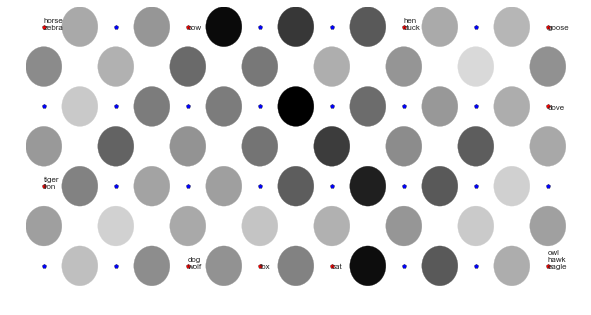

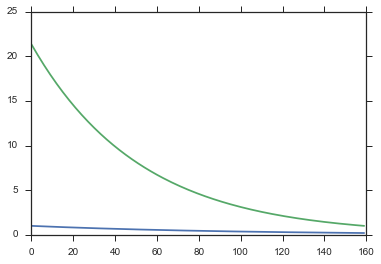

In [5]:
kmap = KohonenUtils.KohonenMap(side_rows=int(math.sqrt(len(animals.index))),
                               side_cols=int(math.sqrt(len(animals.index)) * 2),
                               size_vector=len(animals.columns))
n_iter = 10
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.2, n_iter * len(animals.index))
neighborhood_size = KohonenUtils.ExponentialTimeseries(4./3 * len(animals.index), 1, n_iter * len(animals.index))

kmap.train(animals.as_matrix(), np.array(animals.index), n_iter, learning_rate, neighborhood_size)

kmap.plot_umatrix(plot_names=True, plot_empty=True)



<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Analyze the code (in KohonenUtils.py) to understand what are the uses of each block in the cell right above.</p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: What do you think about the clustering quality ? </p>

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: We plotted the U-Matrix in the previous cell. What does it represent ? </p>
It represents the distance between neurons. 
<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: What do the small stars represent ? What do the bigger circles represent ? </p>
Each small star is a neuron. The bigger circle represents a distance.

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: What does the color in the big circles mean ? </p>
The darker the color the greater the distance is.
<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: What does the color in the small stars mean ? </p>
A red star is a class and a blue star is a hidden neuron.
<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Plot the learning rate and the neighborood size. Why do you think we choose them like this? </p>
We choose it like this so that as we go further into the iterations we have a smaller learning rate which means we are more precise. The jump between iterations becomes smaller. And the neighborhoor size becomes also smaller so that at  the begining every neuron is a neighboor then we diminsh the size meaning we divide the neurons.

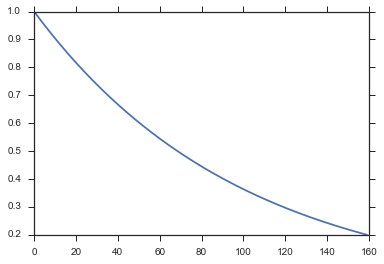

In [8]:
learning_rate.plot()


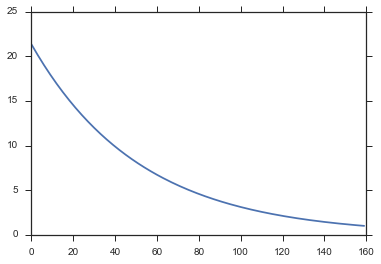

In [7]:
neighborhood_size.plot()

## Exercise 2 : Benchmark Datasets

### Dataset information

In this exercise, we will work with the FCPS benchmark published by A. Ultsch in his paper **"Clustering With SOM"**. FCPS stands for Fundamental Clustering Problems Suite, which is essentially 10 different datasets each having a main problem to adress. As you can find in the README associated with this benchmark, the data sets and main problems adressed are:

| data set      |   main problems of the set                          |   3d
|---            |---                                                  |   
| Hepta         |   none, i.e clear defined clusters                  |   **yes**
| Lsun          |   different variances and inter cluster distances   |   no
| Tetra         |   almost touching clusters                          |   **yes**
| Chainlink     |   linear not separable                              |   **yes**
| Atom          |   different variances and linear not separable      |   **yes**
| EngyTime      |   gaussian mixture                                  |   no
| Target        |   outlier                                           |   no
| TwoDiamonds   |   cluster border defined by density                 |   no
| WingNut       |   density vs. distance                              |   no
| GolfBall      |   no cluster at all                                 |   **yes**

The following script is designed to work with 3d datasets.

### Dataset visualization

In [22]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

locations = pd.DataFrame(columns=['ID', 'X', 'Y', 'Z'])

# Datasets that work with this script are Hepta, Tetra, Chainlink, Atom, GolfBall (they are 3d)
# Datasets in this list do NOT work : Lsun, EngyTime, Target, TwoDiamonds, WingNut (they are 2d)
dataset_name = 'GolfBall'

# Load the 3d-location of each point
with open('FCPS_Data/' + dataset_name + '.lrn', 'r') as f:
    for i, line in enumerate(f):
        if line[0] == "%":
            continue
        key,x,y,z = line.rstrip().split("\t")
        locations.loc[i] = [int(key), float(x), float(y), float(z)]
        
# Load the classes of each point
classes = pd.DataFrame(columns=['ID', 'Class'])
with open('FCPS_Data/' + dataset_name + '.cls', 'r') as f:
    for i, line in enumerate(f):
        if line[0] == "%" or line[0] == "#":
            continue
        key,cl = line.rstrip().split("\t")
        classes.loc[i] = [int(key), int(cl)]

# Group the class labels with the 3d locations of each point
df = pd.merge(locations, classes, on='ID')
df = df.set_index('ID')
df.Class = df.Class.astype(int)

# Prints the first three rows
df.head(3)

X         Y        Z  Class
ID                                     
1.0  0.000000  0.000000  1.00000      1
2.0  0.000000  0.052336  0.99863      1
3.0  0.049774  0.016173  0.99863      1

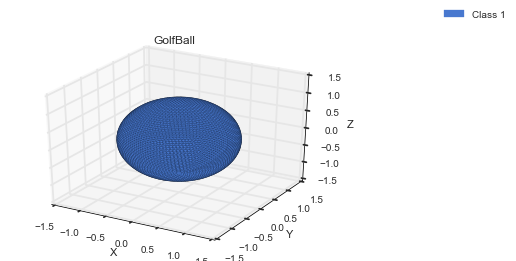

In [23]:
class_colors = KohonenUtils._discrete_colors_from_classes(classes.Class)

## Plots the dataset in 3d
fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')
patches = []
for i in np.unique(df.Class):
    df_class = df[df.Class == i]
    ax.scatter(df_class.X, df_class.Y, df_class.Z, c=class_colors[i])
    patches.append(mpatches.Patch(color=class_colors[i], label='Class ' + str(i)))
pl.legend(handles=patches, bbox_to_anchor=(.5, 1.02, 1., .102),
                      loc=5, ncol=2, borderaxespad=0.)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
_ = pl.title(dataset_name)

### Clustering with SOM

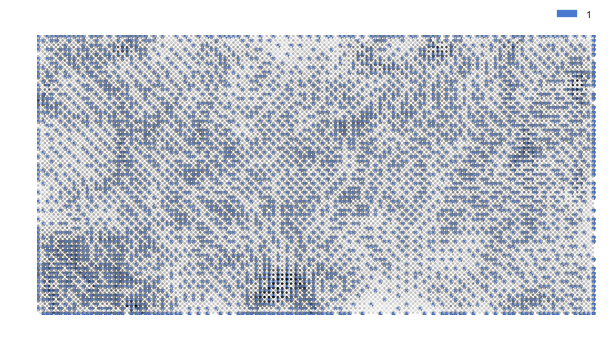

In [25]:
kmap = KohonenUtils.KohonenMap(side_rows=int(math.sqrt(len(df.index))),
                               side_cols=int(math.sqrt(len(df.index)) * 2),
                               size_vector=len(df.columns)-1)
n_iter = 3
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.2, n_iter * len(df.index))
neighborhood_size = KohonenUtils.ExponentialTimeseries(4./3 * len(df.index), 1, n_iter * len(df.index))

kmap.train(df.as_matrix()[:,:-1], np.array(df.Class), n_iter, learning_rate, neighborhood_size)

kmap.plot_umatrix(color_classes=True)

**Note:** the class labels are used only to visualize the results of our clustering method. They are NOT used to train our model as an error signal.

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Which of these five different 3d datasets are clustered correctly by Self-Organizing Map algorithm ? (to try with other datasets, you just have to change the dataset_name variable value and re-run the cells) </p>
GolfBall, Hepta, ChainLink, Atom, Tetra

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Which of these five different 3d datasets would K-Means correctly (or incorrectly) cluster ? Explain briefly why... </p>

## Exercise 3 : Text mining

### Dataset information

In this exercise, we will work with an open dataset of recipes. It is available at [OpenRecipes](https://github.com/fictivekin/openrecipes) as a database dump.

This dataset is a json file, with records looking like:

    { "_id" : { "$oid" : "5160757796cc6207aada3230" }, "totalTime" : "PT30M", "description" : "These muffins are inspired by a new favorite snack of mine: A handful of roasted pistachios and chocolate chips. I really love the flavo", "ingredients" : "1½ cups whole wheat pastry flour\n1¾ cup roasted and unsalted shelled pistachios\n1 teaspoon baking powder\n1 teaspoon baking soda\n½ teaspoon sea salt\n¾ cup milk\n2 eggs\n½ cup coconut oil, walnut oil, or melted butter\n½ cup honey\n1½ cup chocolate chips", "url" : "http://naturallyella.com/2013/03/20/pistachio-and-chocolate-chip-muffins/", "image" : "http://cdn.naturallyella.com/files/2013/03/IMG_6411-2-200x300.jpg", "creator" : "Erin Alderson", "ts" : { "$date" : 1365276023004 }, "datePublished" : "2013-03-20T07:42:13+00:00", "source" : "naturallyella", "recipeYield" : "12", "cookTime" : "PT20M", "recipeCategory" : "Snack", "prepTime" : "PT10M", "name" : "Pistachio Chocolate Chip Muffins" }

With this dataset, we will first create features based on the ingredients of each recipe and then train a Kohonen map on these features. What we hope to discover is insights on a hidden structure... but first, we need to preprocess the data in order to make it easier to interpret. Note that this preprocessing is on Text Data. We call this domain "Text Mining". In order to continue, we use a corpora named "wordnet" which you can read about here: http://www.nltk.org/book/ch02.html#wordnet

To download this corpus, you will need the nltk (Natural Language Toolkit) package (generally included in anaconda installation). You should then open a python console, and run the following:

> import nltk; nltk.download()

This will open a window for you to download NLTK data. You can then either select the wordnet corpus under the "Corpora" tab, or download everything if you prefer (you can then create your own Text Mining applications).

After that, you should be able to run the TextMining.py main function, either from the terminal:

    $ ./TextMining.py
    
    There are 500 occurences of the word "fish" (50.0%)
    There are 500 occurences of the word "chocolate" (50.0%)
    There are 1000 recipes, and therefore 0.0% redundancy between words.

... or from the next cell:

In [ ]:
from TextMining import main

filter_words = ['fish', 'chocolate']

main(filter_words=filter_words)

By default, there are 1000 recipes considered, and we only filter recipes containing "fish" and "chocolate" in their title. Of course you can change that by modifying the python code. At the end, two files are generated:
- "Recipes.pkl" which contains recipes names and ingredients
- "Features_Exercise3.npy" which contains the TF-IDF (https://en.wikipedia.org/wiki/Tf%E2%80%93idf) vector of all ingredients for each recipe

### Dataset visualization

In [ ]:
from math import sqrt
from pandas.io.pickle import read_pickle

matrix = np.load('features_exercise3.npy')

recipes = read_pickle('recipes.pkl')
recipes.head(2)

As we said before, each line of these recipes "belongs" to a filter word.

Let us link back these filter words to each line:

In [ ]:
# Let us add the "class" back into the recipes dataset
corresponding_filter_words = []
for recipe_id in range(len(recipes.index)):
    for filter_word in filter_words:
        if filter_word in recipes.iloc[recipe_id].Name:
            corresponding_filter_words.append(filter_word)
            continue
recipes['Filter'] = corresponding_filter_words
recipes.head(2)

In [ ]:
print matrix.shape

Note that we have:
1. the "recipes" variable which is a pandas DataFrame, with each line being a recipe metadatas
2. the "matrix" variable which is a numpy array, with each line being the computed TF-IDF of a recipe

The matrix therefore contains the features.

### Clustering with SOM

We can then train our Kohononen map on these features.

Note that (as there are a lot of features ---every unique ingredient over all recipes--- the cosine metric is preferred to euclidean metric):

In [ ]:
################################################
### CAREFUL: THIS CELL IS PRETTY LONG TO RUN ###
################################################

# As we are dealing with TF-IDF values, therefore a lot of columns (features), the euclidean metric won't work well
# We can work with the cosine_metric instead https://en.wikipedia.org/wiki/Cosine_similarity
kmap = KohonenUtils.KohonenMap(side_rows=int(math.sqrt(matrix.shape[0]) * 2),
                               side_cols=int(math.sqrt(matrix.shape[0])),
                               size_vector=matrix.shape[1],
                               metric_name='cosine_metric')

n_iter = 5
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.05, n_iter*matrix.shape[0])
neighborhood_size = KohonenUtils.ExponentialTimeseries(2./3 * kmap._map.shape[0], 1, n_iter*matrix.shape[0])

kmap.train(matrix, np.array(recipes.Filter), n_iter, learning_rate, neighborhood_size)

In [ ]:
kmap.plot_umatrix(color_classes=True, plot_index=True, figsize=(10, 20))

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Comment the clustering obtained. Is it perfect ? Explain why you think that... If not, how could it be enhanced ?</p>

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Try different filter words than "chocolate" and "fish" (In order to do this, you either have to call the "main" function as seen a few cells before, or to modify the python code in the TextMining.py file)</p>

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: In the class WordAccepter located in the TextMining.py file, we filter words that contains at least one of the wrong words (defined in the main function at line 177) in their [hypernyms](http://en.wikipedia.org/wiki/Hyponymy_and_hypernymy). Why do you think we are doing that ?</p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Find the class of the variable responsible for extracting the TF-IDF and search for it on the internet. This class has a lot of parameters, what is the n-gram parameter responsible for?</p>

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Print the vocabulary that we have at the end (after TF-IDF transformation). What is the size of this vocabulary? </p>

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Consider the vocabulary in the previous question. Do some words in it look like they don't belong in that list (explain why)? If yes, how would you modify the code to remove them (find a practical solution)? If no, we may have filtered the words too hard, how would you modify the code to let more words be in the final vocabulary (find a practical solution)?</p>